Configurando o ambiente de exemplo...
Ambiente de exemplo configurado.

Lendo o arquivo: analises10\dadosCliente.csv
Exibindo gráfico para dadosCliente.csv...


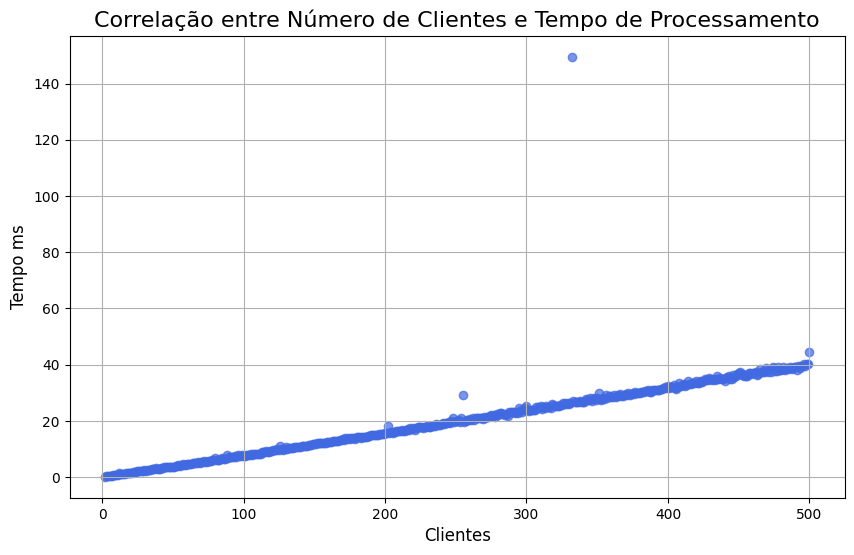

Lendo o arquivo: analises10\dadosPacote.csv
Exibindo gráfico para dadosPacote.csv...


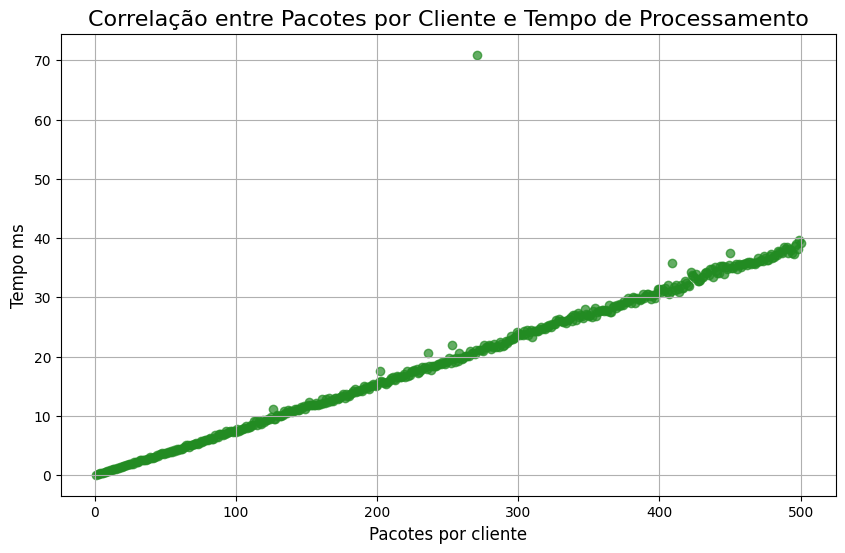

Lendo o arquivo: analises10\dadosEvento.csv
Exibindo gráfico para dadosEvento.csv...


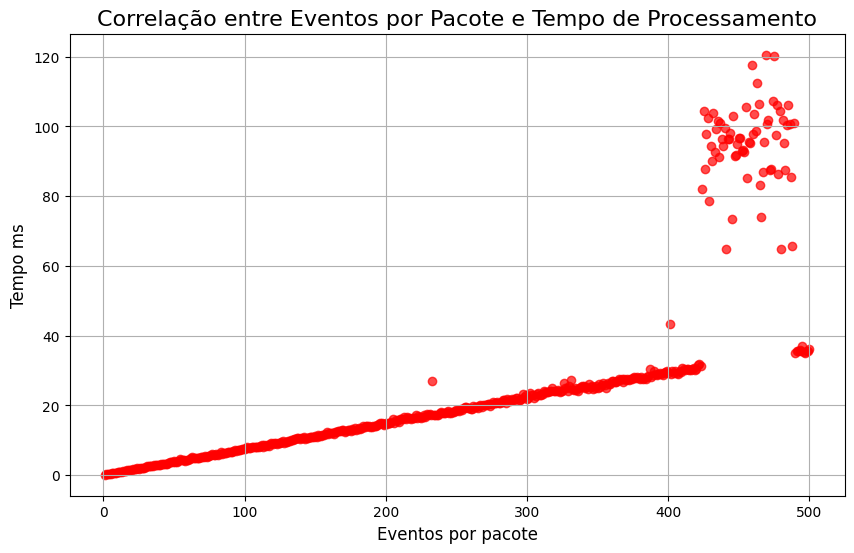


Análise concluída.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# --- Passo 0: Configuração Inicial (Criar pasta e arquivos de exemplo) ---
# Esta parte é apenas para garantir que o código possa ser executado imediatamente.
# Se você já possui a pasta 'analises5' com seus arquivos, pode pular ou remover esta seção.

print("Configurando o ambiente de exemplo...")
folder_name = 'analises30'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    print(f"Pasta '{folder_name}' criada.")

# Dicionário com os nomes dos arquivos e suas respectivas colunas
sample_files_info = {
    'dadosCliente.csv': ['clientes', 'tempo_ms'],
    'dadosPacote.csv': ['pacotes_por_cliente', 'tempo_ms'],
    'dadosEvento.csv': ['eventos_por_pacote', 'tempo_ms']
}

# Criar arquivos CSV de exemplo com dados fictícios
for filename, columns in sample_files_info.items():
    file_path = os.path.join(folder_name, filename)
    if not os.path.exists(file_path):
        print(f"Criando arquivo de exemplo: {filename}")
        # Gerando dados fictícios com uma correlação positiva
        x_data = np.random.randint(1, 101, size=50)
        y_data = x_data * np.random.uniform(1.5, 2.5, size=50) + np.random.randint(-20, 20, size=50)
        df_sample = pd.DataFrame({
            columns[0]: x_data,
            columns[1]: y_data
        })
        df_sample.to_csv(file_path, index=False)
print("Ambiente de exemplo configurado.\n")

# --- Fim da Configuração Inicial ---


# --- Passo 1: Definição dos arquivos a serem analisados (COM CORES) ---
folder_path = 'analises30'

files_to_plot = [
    {
        "filename": "dadosCliente.csv",
        "x_col": "clientes",
        "y_col": "tempo_ms",
        "title": "Correlação entre Número de Clientes e Tempo de Processamento",
        "color": "royalblue"  # Cor para o primeiro gráfico
    },
    {
        "filename": "dadosPacote.csv",
        "x_col": "pacotes_por_cliente",
        "y_col": "tempo_ms",
        "title": "Correlação entre Pacotes por Cliente e Tempo de Processamento",
        "color": "forestgreen" # Cor para o segundo gráfico
    },
    {
        "filename": "dadosEvento.csv",
        "x_col": "eventos_por_pacote",
        "y_col": "tempo_ms",
        "title": "Correlação entre Eventos por Pacote e Tempo de Processamento",
        "color": "red"  # Cor para o terceiro gráfico
    }
]

# --- Passo 2: Loop para ler cada arquivo e gerar o gráfico ---
for file_info in files_to_plot:
    file_path = os.path.join(folder_path, file_info["filename"])

    try:
        # Tenta ler o arquivo CSV para um DataFrame do pandas
        print(f"Lendo o arquivo: {file_path}")
        df = pd.read_csv(file_path)

        # Extrai as colunas com base nas definições
        x_values = df[file_info["x_col"]]
        y_values = df[file_info["y_col"]]

        # --- Passo 3: Criação do Gráfico ---
        plt.figure(figsize=(10, 6))  # Define o tamanho da figura para melhor visualização

        # Gráfico de dispersão USANDO A COR DEFINIDA NO DICIONÁRIO
        plt.scatter(x_values, y_values, alpha=0.7, c=file_info["color"])

        # Adiciona títulos e rótulos
        plt.title(file_info["title"], fontsize=16)
        plt.xlabel(file_info["x_col"].replace('_', ' ').capitalize(), fontsize=12)
        plt.ylabel(file_info["y_col"].replace('_', ' ').capitalize(), fontsize=12)

        # Adiciona um grid para facilitar a leitura
        plt.grid(True)

        # Exibe o gráfico
        print(f"Exibindo gráfico para {file_info['filename']}...")
        plt.show()

    except FileNotFoundError:
        print(f"ERRO: O arquivo '{file_path}' não foi encontrado. Verifique o nome e o caminho.")
    except KeyError as e:
        print(f"ERRO: A coluna {e} não foi encontrada no arquivo '{file_path}'. Verifique o cabeçalho do CSV.")
    except Exception as e:
        print(f"Ocorreu um erro inesperado ao processar o arquivo '{file_path}': {e}")

print("\nAnálise concluída.")